# **TASK 1 - Prediction using Supervised ML **

      To Predict the percentage of an student based on the no. of study hours.

## Author - Priyanka Biswas

In [1]:
# For reading data set
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [2]:
# Reading data from remote link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
data.shape

(25, 2)

In [6]:
data.describe

<bound method NDFrame.describe of     Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86>

# Visualization

<function matplotlib.pyplot.show(close=None, block=None)>

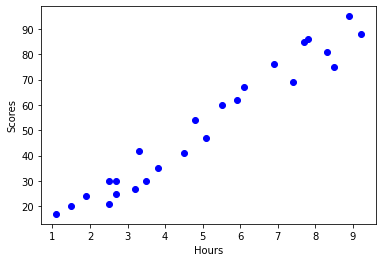

In [39]:
plt.plot(data.Hours,data.Scores,"bo");plt.xlabel("Hours");plt.ylabel("Scores")
plt.show 

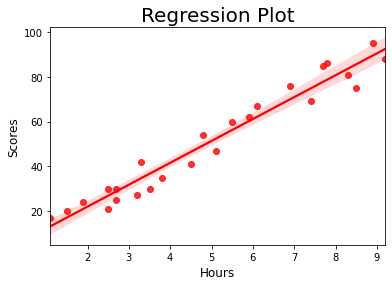

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [40]:
sns.regplot(x= data['Hours'], y= data['Scores'],color='red')
plt.title('Regression Plot',size=20)
plt.ylabel('Scores', size=12)
plt.xlabel('Hours', size=12)
plt.show()
print(data.corr())

# Variables are positively correlated

## 1. Preparing linear regression model with statsmodels.formula.api

In [41]:
first_model = smf.ols("Scores~Hours",data=data).fit()
lm = LinearRegression()
X = np.array([data["Hours"]])
Y = np.array([data["Scores"]])
print (X)
print (Y)

[[2.5 5.1 3.2 8.5 3.5 1.5 9.2 5.5 8.3 2.7 7.7 5.9 4.5 3.3 1.1 8.9 2.5 1.9
  6.1 7.4 2.7 4.8 3.8 6.9 7.8]]
[[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
  86]]


In [42]:
# For getting coefficients of the varibles used in equation
print (first_model.params)

Intercept    2.483673
Hours        9.775803
dtype: float64


In [43]:
# 95% confidence interval
print (first_model.conf_int(0.05))

                  0          1
Intercept -2.753470   7.720817
Hours      8.838823  10.712784


In [44]:
test_data_frame = pd.DataFrame({"Hours":[9.25]})
print (test_data_frame)

   Hours
0   9.25


In [45]:
# Predicted values of Hours using the model
pred = first_model.predict(test_data_frame.iloc[:,0]) 
test_data_frame["Predicted Scores"] = pred
print (test_data_frame)

   Hours  Predicted Scores
0   9.25         92.909855


### Visually Comparing the Predicted Scores with the Scores with statsmodel

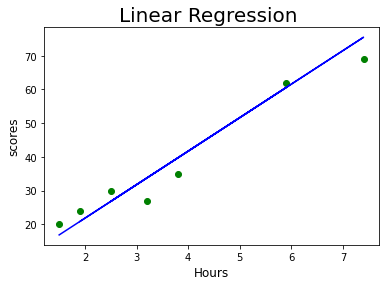

In [49]:
plt.scatter(x=val_X, y=val_y, color='green')
plt.plot(val_X, pred_y, color='Blue')
plt.title('Linear Regression ', size=20)
plt.ylabel('scores', size=12)
plt.xlabel('Hours', size=12)
plt.show()

## 2. Training the Model

###  Splitting the Data

In [26]:
# Defining X and y from the Data
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

# Spliting the Data in two
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

### Fitting the Data into the model

In [27]:
regression = LinearRegression()
regression.fit(train_X, train_y)
print("---------Trained Model---------")

---------Trained Model---------


### Predicting the Scores

In [28]:
pred_y = regression.predict(val_X)
prediction = pd.DataFrame({'Hours': [i[0] for i in val_X], 'Predicted Scores': [k for k in pred_y]})
prediction

,Hours,Predicted Scores
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


### Comparing the Predicted Scores with Scores

In [29]:
compare_scores = pd.DataFrame({'Scores': val_y, 'Predicted Scores': pred_y})
compare_scores

,Scores,Predicted Scores
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


### Visually Comparing the Predicted Scores with the Scores

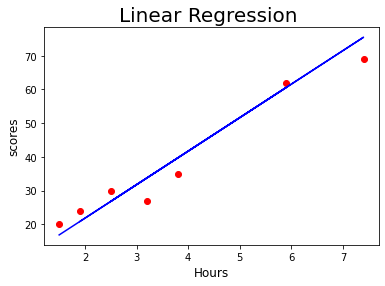

In [47]:
plt.scatter(x=val_X, y=val_y, color='Red')
plt.plot(val_X, pred_y, color='Blue')
plt.title('Linear Regression ', size=20)
plt.ylabel('scores', size=12)
plt.xlabel('Hours', size=12)
plt.show()

### The Model

In [31]:
# Calculating the accuracy of the model
print('Mean absolute error: ',mean_absolute_error(val_y,pred_y))

Mean absolute error:  4.130879918502481


### predicted score if a student studies for 9.25 hrs/ day? 

In [32]:
hours = [9.25]
answer = regression.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 93.893


#### According to the regression model if a student studies for 9.25 hours a day likely to score 93.89 marks.<br> According to the statsmodel.api if a student studies for 9.25 hours a day likely to score 92.91 marks.